In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

import configuration as config
import functions as funcs

#### Load Data

In [10]:
with open(config.DATA_FILE, 'rb') as input_file:
    data = pickle.load(input_file)
    
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
accuracy = accuracy_score(model.predict(X_train), y_train)
print(f'Accuracy of random forest model: {accuracy:.2f}')

Accuracy of random forest model: 1.00


In [43]:

from sklearn.model_selection import cross_val_score

cross_val_scores = {
    'Model': [],
    'Score': [],
}

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=7, n_jobs=-1)

# Store results
cross_val_scores['Model'].extend(['Baseline'] * len(scores))   
cross_val_scores['Score'].extend(scores * 100)

# Print results
print(f'Cross-validation accuracy: {np.mean(scores) * 100:.1f} +/- {np.std(scores) * 100:.1f}%')

Cross-validation accuracy: 75.9 +/- 3.4%


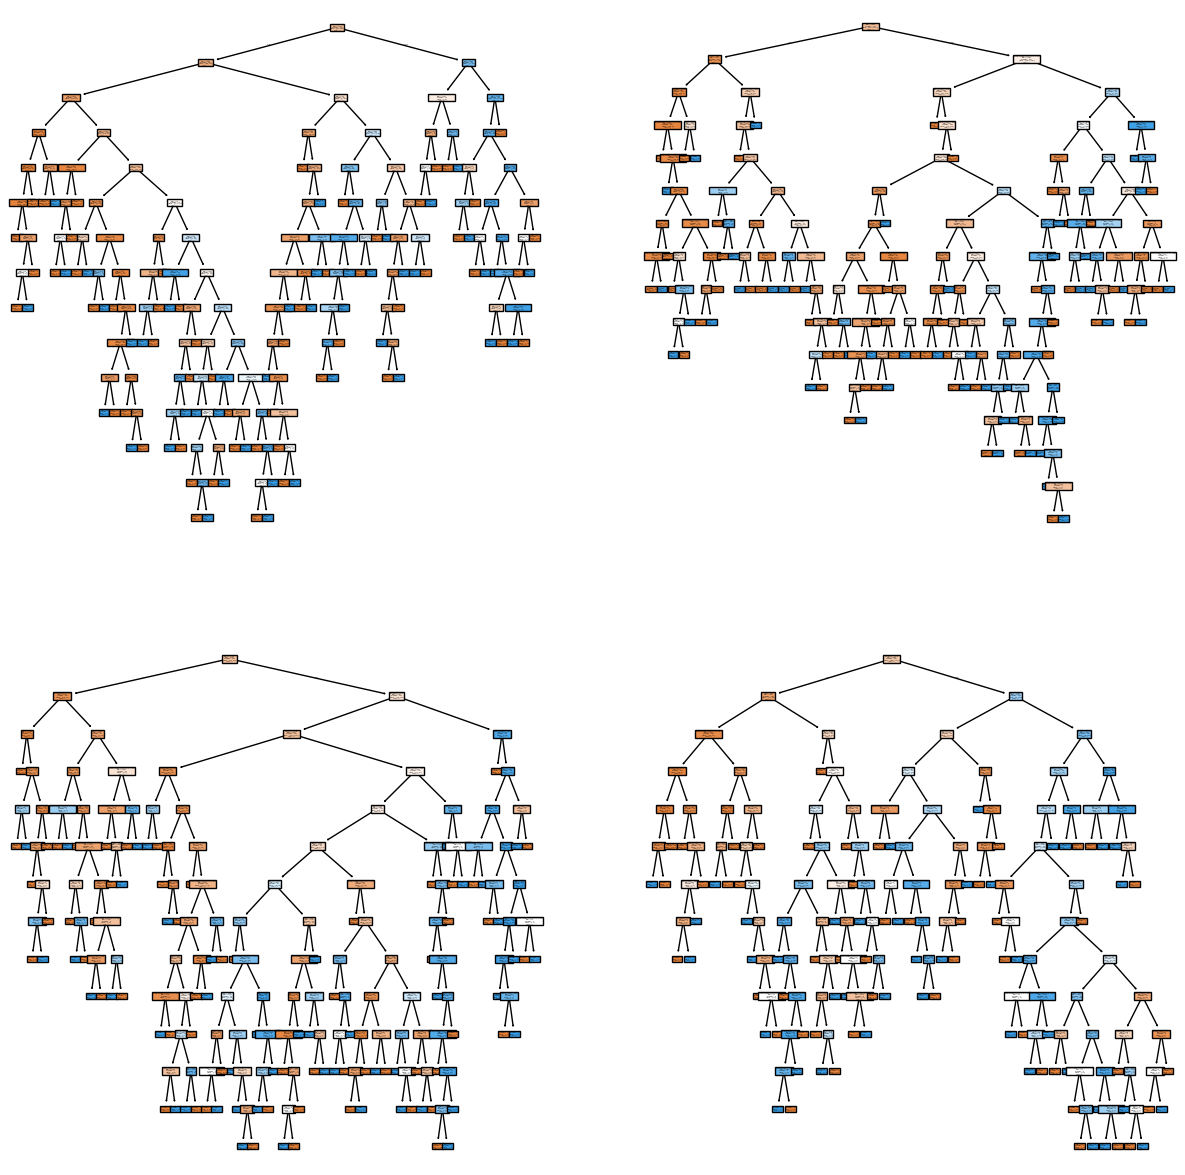

In [44]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2,2, figsize = (15,15))

tree.plot_tree(model.estimators_[0], ax = axis[0,0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0,1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1,0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1,1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [55]:
#Some model Optimization here
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'n_estimators': [2, 5, 10, 50, 150],  
    'criterion' : ["gini", "entropy"],
    'max_depth': [3, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'min_impurity_decrease':[0.0005,0.001,0.002],
    'ccp_alpha':[0,10**-7,10**-6,10**-5]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, return_train_score=True)
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0, 1e-07, 1e-06, 1e-05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_impurity_decrease': [0.0005, 0.001, 0.002],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 5, 10, 50, 150]},
             return_train_score=True, scoring='accuracy')

Best hyperparameters: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_impurity_decrease': 0.001, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}


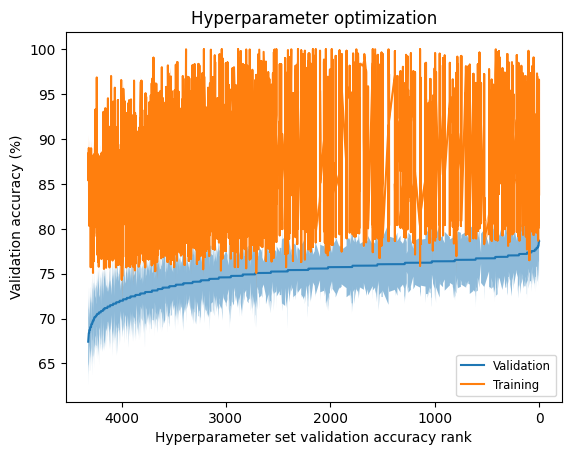

In [56]:

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Fit the grid search model
grid.fit(X_train, y_train)

# Print best hyperparameters
print(f"Best hyperparameters: {grid.best_params_}")

# Pass cv_results_ directly to the function
funcs.plot_cross_validation(grid)

In [57]:
scores=cross_val_score(model,X_train,y_train,cv=7,n_jobs=-1
)

cross_val_scores['Model'].extend(['Optimized']*len(scores))
cross_val_scores['Score'].extend(scores*100)

print(f'Cross-validation accuracy: {np.mean(scores)*100:.1f} +/- {np.std(scores)*100:.1f}%')

Cross-validation accuracy: 76.2 +/- 2.8%


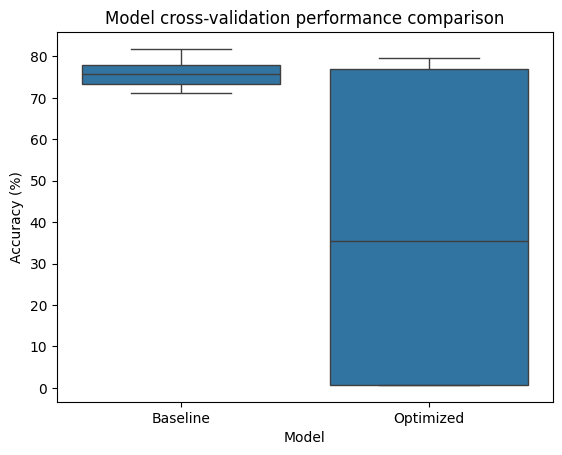

In [58]:
sns.boxplot(pd.DataFrame.from_dict(cross_val_scores), x='Model', y='Score')
plt.title('Model cross-validation performance comparison')
plt.ylabel('Accuracy (%)')
plt.show()

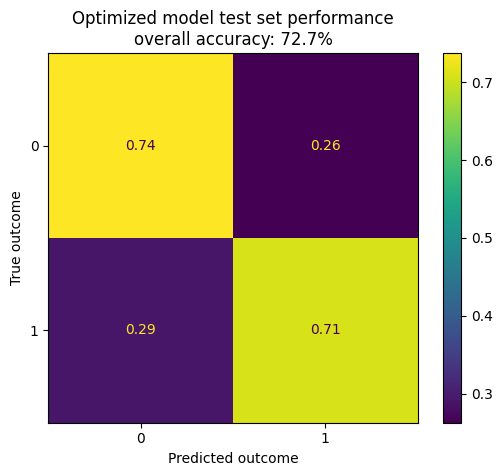

In [59]:
testing_predictions=model.predict(X_test)
accuracy=accuracy_score(testing_predictions, y_test)*100

# Plot the confusion matrix
cm=confusion_matrix(y_test, testing_predictions, normalize='true')
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm)
_=cm_disp.plot()

plt.title(f'Optimized model test set performance\noverall accuracy: {accuracy:.1f}%')
plt.xlabel('Predicted outcome')
plt.ylabel('True outcome')
plt.show()